In [0]:
import numpy as np

In [0]:
np.random.seed(34)

In [0]:
import keras

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10

In [0]:
(X_train, y_train), (X_test, y_test) =cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Dense, Convolution2D, Flatten, Activation, MaxPooling2D, Dropout

In [0]:
from keras.optimizers import SGD

In [0]:
import matplotlib.pyplot as plt

In [0]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
y_train.shape

(50000, 1)

In [0]:
#X = X_train[101].reshape([28,28])

In [0]:
plt.gray()

<Figure size 432x288 with 0 Axes>

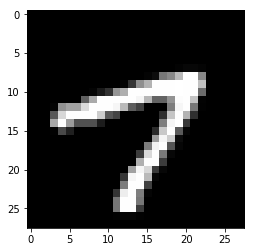

In [0]:
plt.imshow(X)

In [0]:
y_train[101]

array([3], dtype=uint8)

In [0]:
X_test.shape

(10000, 32, 32, 3)

In [0]:
y_test.shape

(10000, 1)

In [0]:
type(X_train[0])

numpy.ndarray

In [0]:
X_train =X_train.astype('float32') / 255

In [0]:
X_test =X_test.astype('float32') / 255

In [0]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [0]:
n_classes =10

In [0]:
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [0]:
X_train.shape[0]

50000

In [0]:
y_train.shape

(50000, 10)

In [0]:
#X_train = X_train.reshape(X_train.shape[0],28,28,1)
#X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [0]:
#model = Sequential()

from keras.layers import Input, Conv2D, Flatten
from keras.models import Model

input_img = Input(shape=(32,32,3))

tower1 = Conv2D(64, (3,3), padding='same', activation='relu')(input_img)
tower2 = Conv2D(32, (3,3), padding='same', activation='relu')(tower1)
tower3 = Conv2D(16, (3,3), padding='same', activation='relu')(tower2)
tower4 = Flatten()(tower3)
tower5 = Dense(10, activation='softmax')(tower4)
model = Model(inputs=input_img, outputs=tower5)

In [0]:
#model.add(Convolution2D(64, (7, 7), padding='same', input_shape=X_train.shape[1:], activation='relu')) 
# (Number_Input_Channels * Kernal_H * Kernal_W * Number_Output_Images) + Number_Output_Images = (1 * 3 * 3 * 32) + 32 = 320
#model.add(MaxPooling2D(pool_size=(2, 2)))  # Only Forward Pass. Not used for Backprop.
# H/2, W/2 = 26/2, 26/2 = 13, 13
#model.add(Dropout(0.5))
#model.add(Convolution2D(32, (3, 3), padding='valid', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))  # Only Forward Pass. Not used for Backprop.
# H/2, W/2 = 26/2, 26/2 = 13, 13
#model.add(Dropout(0.5))
# (Number_Input_Channels * Kernal_H * Kernal_W * Number_Output_Images) + Number_Output_Images = (32 * 3 * 3 * 64) + 64 = 18496
#model.add(Convolution2D(16, (3, 3), padding='valid', activation='relu'))
# Output_Shape = (H-1), (W-1), 

In [0]:
#model.add(MaxPooling2D(pool_size=(2, 2)))  # Only Forward Pass. Not used for Backprop.
# H/2, W/2 = 26/2, 26/2 = 13, 13
#model.add(Dropout(0.5))

In [0]:
#model.add(Flatten())
# Number_Input_Channels * H * W = 64 * 13 * 13 = 10816

In [0]:
#model.add(Dense(10, activation='softmax'))
# (Input_shape * Neurons) + Neurons = (10816 * 10) + 10

In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        4624      
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                163850    
Total params: 188,730
Trainable params: 188,730
Non-trainable params: 0
_____________________________________________________

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystopping = EarlyStopping(monitor='val_loss', verbose=1, 
                              restore_best_weights = True)
#checkpoint = ModelCheckpoint(filepath="./checkpoint",  monitor='val_loss', verbose=1,save_best_only=True)

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=1),metrics=['accuracy'])

In [0]:
#model.fit(X_train, y_train, batch_size=1024,epochs=2000,verbose=1, 
          validation_data=(X_test, y_test),)
model.fit(X_train, y_train, batch_size=1024,epochs=200,verbose=1, 
          validation_data=(X_test, y_test),  callbacks=[earlystopping])

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 9s 176us/step - loss: 0.0732 - acc: 0.4088 - val_loss: 0.0729 - val_acc: 0.4129

Epoch 00001: val_loss improved from inf to 0.07285, saving model to ./checkpoint
Epoch 2/200
49152/50000 [============================>.] - ETA: 0s - loss: 0.0721 - acc: 0.4214

KeyboardInterrupt: ignored

In [0]:
score = model.evaluate(X_test, y_test, verbose=1) 
print('loss=', score[0]) 
print('accuracy=', score[1]) 


10000/10000 [==============================] - 1s 66us/step
loss= 0.011759458650136367
accuracy= 0.9236
